In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rd
from scipy import interpolate as ip

## Interpolation:
- There are multiple interpolation methods for computing, i.e, 
1. Newton Interpolation
2. Legrange Interpolation
3. Spline Interpolatoin.

Here we are going to use the **Spline Interpolation**.
Here are some resources about that
1. [A small Introductoin](https://youtu.be/YMl25iCCRew)
2. [1hr Freya Holmer video ](https://youtu.be/jvPPXbo87ds) 

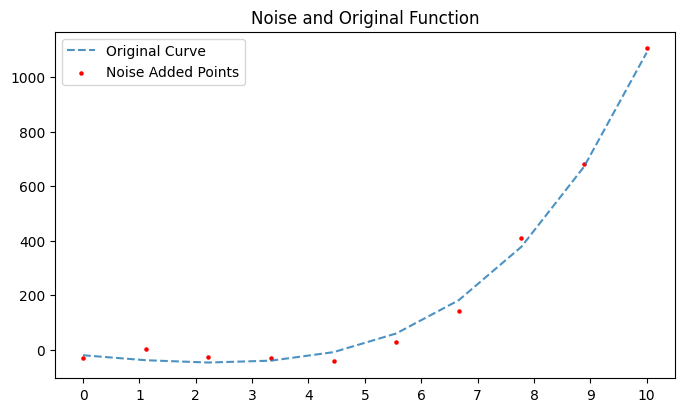

In [3]:

def myFunction(x,noise):
    return [(0.1*x**4)+3.1*x**2-20*x-20,(0.1*x**4)+3.1*x**2-20*x-20+(noise-0.5)*90]
np.random.seed(42)
plt.figure(figsize=(8,4.5))
n_points=10
x_array=np.linspace(0,10,n_points)
y_array=myFunction(x=x_array,noise=np.random.random(n_points))
plt.plot(x_array,y_array[0],alpha=0.8,label="Original Curve",linestyle="--")
plt.scatter(x_array,y_array[1],s=5,color="red",label="Noise Added Points")
plt.legend(loc="upper left")
plt.title("Noise and Original Function")
plt.xticks([n for n in range(11)])
plt.show()

**Linear Interpolation:**
Linear interpolatoin doesn't care about Derivatives, and its just connecting dots with straight line.
It is okay when we have very large number of points in dataset with less noise.

<class 'scipy.interpolate._interpolate.interp1d'>


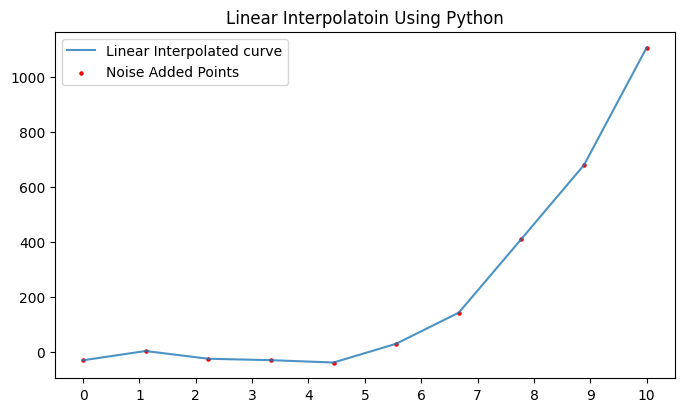

In [4]:
spline_linear=ip.interp1d(x=x_array,y=y_array[1],kind="linear")
print(type(spline_linear))
plt.figure(figsize=(8,4.5))
plt.plot(x_array,spline_linear(x_array),alpha=0.8,label="Linear Interpolated curve")
plt.scatter(x_array,y_array[1],s=5,color="red",label="Noise Added Points")
plt.legend(loc="upper left")
plt.title("Linear Interpolatoin Using Python")
plt.xticks([n for n in range(11)])
plt.show()

**Cubic Splines Interpolatoin:** Here we can make the interpolated curve or points to have continous derivatives.

<class 'scipy.interpolate._interpolate.interp1d'>


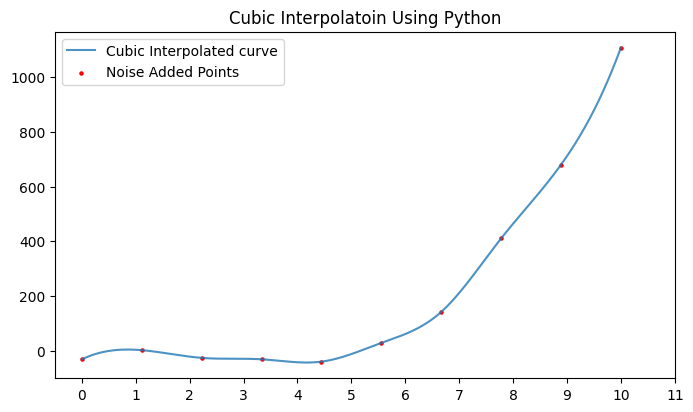

In [5]:
spline_cubic=ip.interp1d(x=x_array,y=y_array[1],kind="cubic")
print(type(spline_cubic))
plt.figure(figsize=(8,4.5))
new_x_array=np.linspace(0,10,1000)
func_y=myFunction(new_x_array,noise=new_x_array)[0]
plt.plot(new_x_array,spline_cubic(new_x_array),alpha=0.8,label="Cubic Interpolated curve")
plt.scatter(x_array,y_array[1],s=5,color="red",label="Noise Added Points")
plt.legend(loc="upper left")
plt.title("Cubic Interpolatoin Using Python")
plt.xticks([n for n in range(12)])
# To zoom uncommand this:
# plt.xlim(1,2.6)
# plt.ylim(-55,-20)
plt.show()

**Perturbed Data:**

<class 'scipy.interpolate._interpolate.interp1d'>


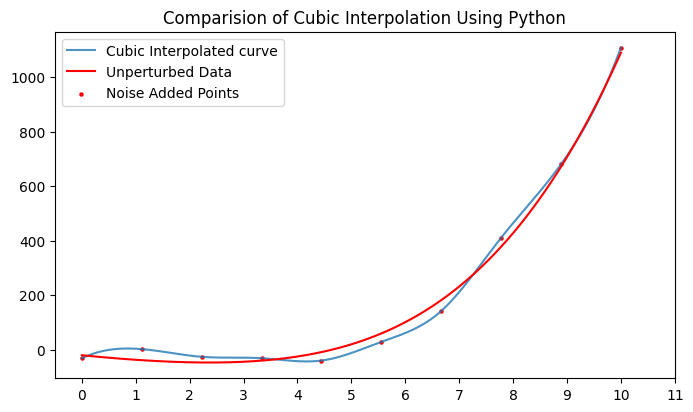

In [6]:
spline_cubic=ip.interp1d(x=x_array,y=y_array[1],kind="cubic")
print(type(spline_cubic))
plt.figure(figsize=(8,4.5))
plt.plot(new_x_array,spline_cubic(new_x_array),alpha=0.8,label="Cubic Interpolated curve")
plt.plot(new_x_array,func_y,color="red",label="Unperturbed Data")
plt.scatter(x_array,y_array[1],s=5,color="red",label="Noise Added Points")
plt.legend(loc="upper left")
plt.title("Comparision of Cubic Interpolation Using Python")
plt.xticks([n for n in range(12)])
plt.show()

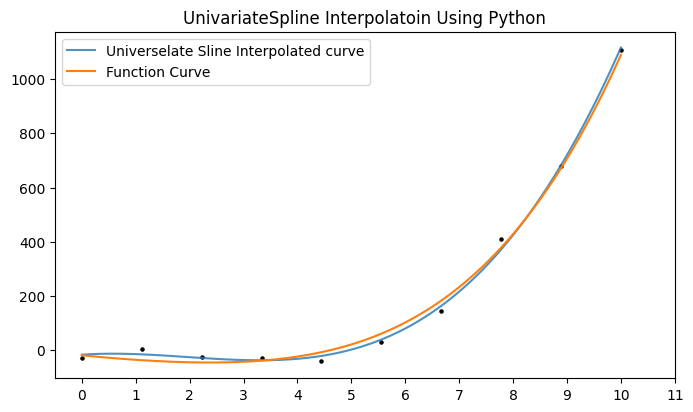

In [7]:
# To have even more smooth curve
spline_smooth=ip.UnivariateSpline(x=x_array,y=y_array[1],s=10000) #s is here for the smoothening factor
plt.figure(figsize=(8,4.5))
new_x_array=np.linspace(0,10,1000)
plt.plot(new_x_array,spline_smooth(new_x_array),alpha=0.8,label="Universelate Sline Interpolated curve")
plt.scatter(x_array,y_array[1],s=5,color="black")

plt.title("UnivariateSpline Interpolatoin Using Python")
plt.plot(new_x_array,func_y,label="Function Curve")
plt.xticks([n for n in range(12)])
# plt.xlim(0,4)
# plt.ylim(-40,15)
plt.legend(loc="upper left")
plt.show()

## How to fit data with a polynomial: 
- If we have a polynomial with degree of n can have n number of roots and we can push it to touch the (n+1) datapoints we have with different coefficients.
- For that we just want to do the simple highschool matrix problem.

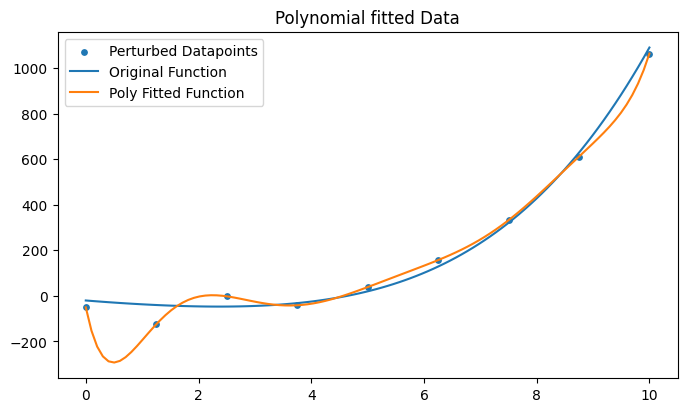

In [8]:
np.random.seed(1)
n=9
x_max=10
x_array=np.linspace(0,x_max,n)
x_full_array=np.linspace(0,x_max,100)
y_array=myFunction(x=x_array,noise=-2*(np.random.random(n)-1/2))
plt.figure(figsize=(8,4.5))
plt.scatter(x_array,y_array[1],label="Perturbed Datapoints",s=15)
plt.plot(x_full_array,myFunction(x_full_array,noise=0)[0],label="Original Function")
data_array=np.array([y_array[1]]).T
def matrix_gen(x_array=x_array): #we can use the np.vander but here im just doing to get the basics
    matrix=[]
    for x in  x_array:
        y=[x**n for n in range(n)]
        matrix.append(y)
    return np.array(matrix)
matrix=matrix_gen()
mat_inv=np.linalg.inv(matrix) #we can use np.linalg.solve both will give same results
co_effs=np.dot(mat_inv,data_array)
def polyfitted_function(x,co_effs=co_effs):
    co_effs=co_effs.flatten()
    x=x.flatten()
    c=sum([co_effs[n]*(x**n) for n in range(len(co_effs))])
    return c
plt.plot(x_full_array,polyfitted_function(x=x_full_array),label="Poly Fitted Function ")
plt.title("Polynomial fitted Data")
plt.legend(loc="upper left")
plt.show()


## Calculating fitting Error:
Very common choice of finding the error is,
$$\Delta= \sum\limits _{i=1}^{n} (y_i-f(x_{i}))^{2}$$

In [ ]:
def error_calculation(x_data=x_array):
    y=0
    for i,x in enumerate(x_data):
        y+=(y_array[0][i]-polyfitted_function(x).item())
    return int(y)
print(error_calculation())

64
